- Gülin Çetinus
- 21902115
- IE 423 - Final exam
- 03/08/2024

# Initialize

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

# Load data

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# EDA

Create pairplots to visualize the relationships between each feature pair.

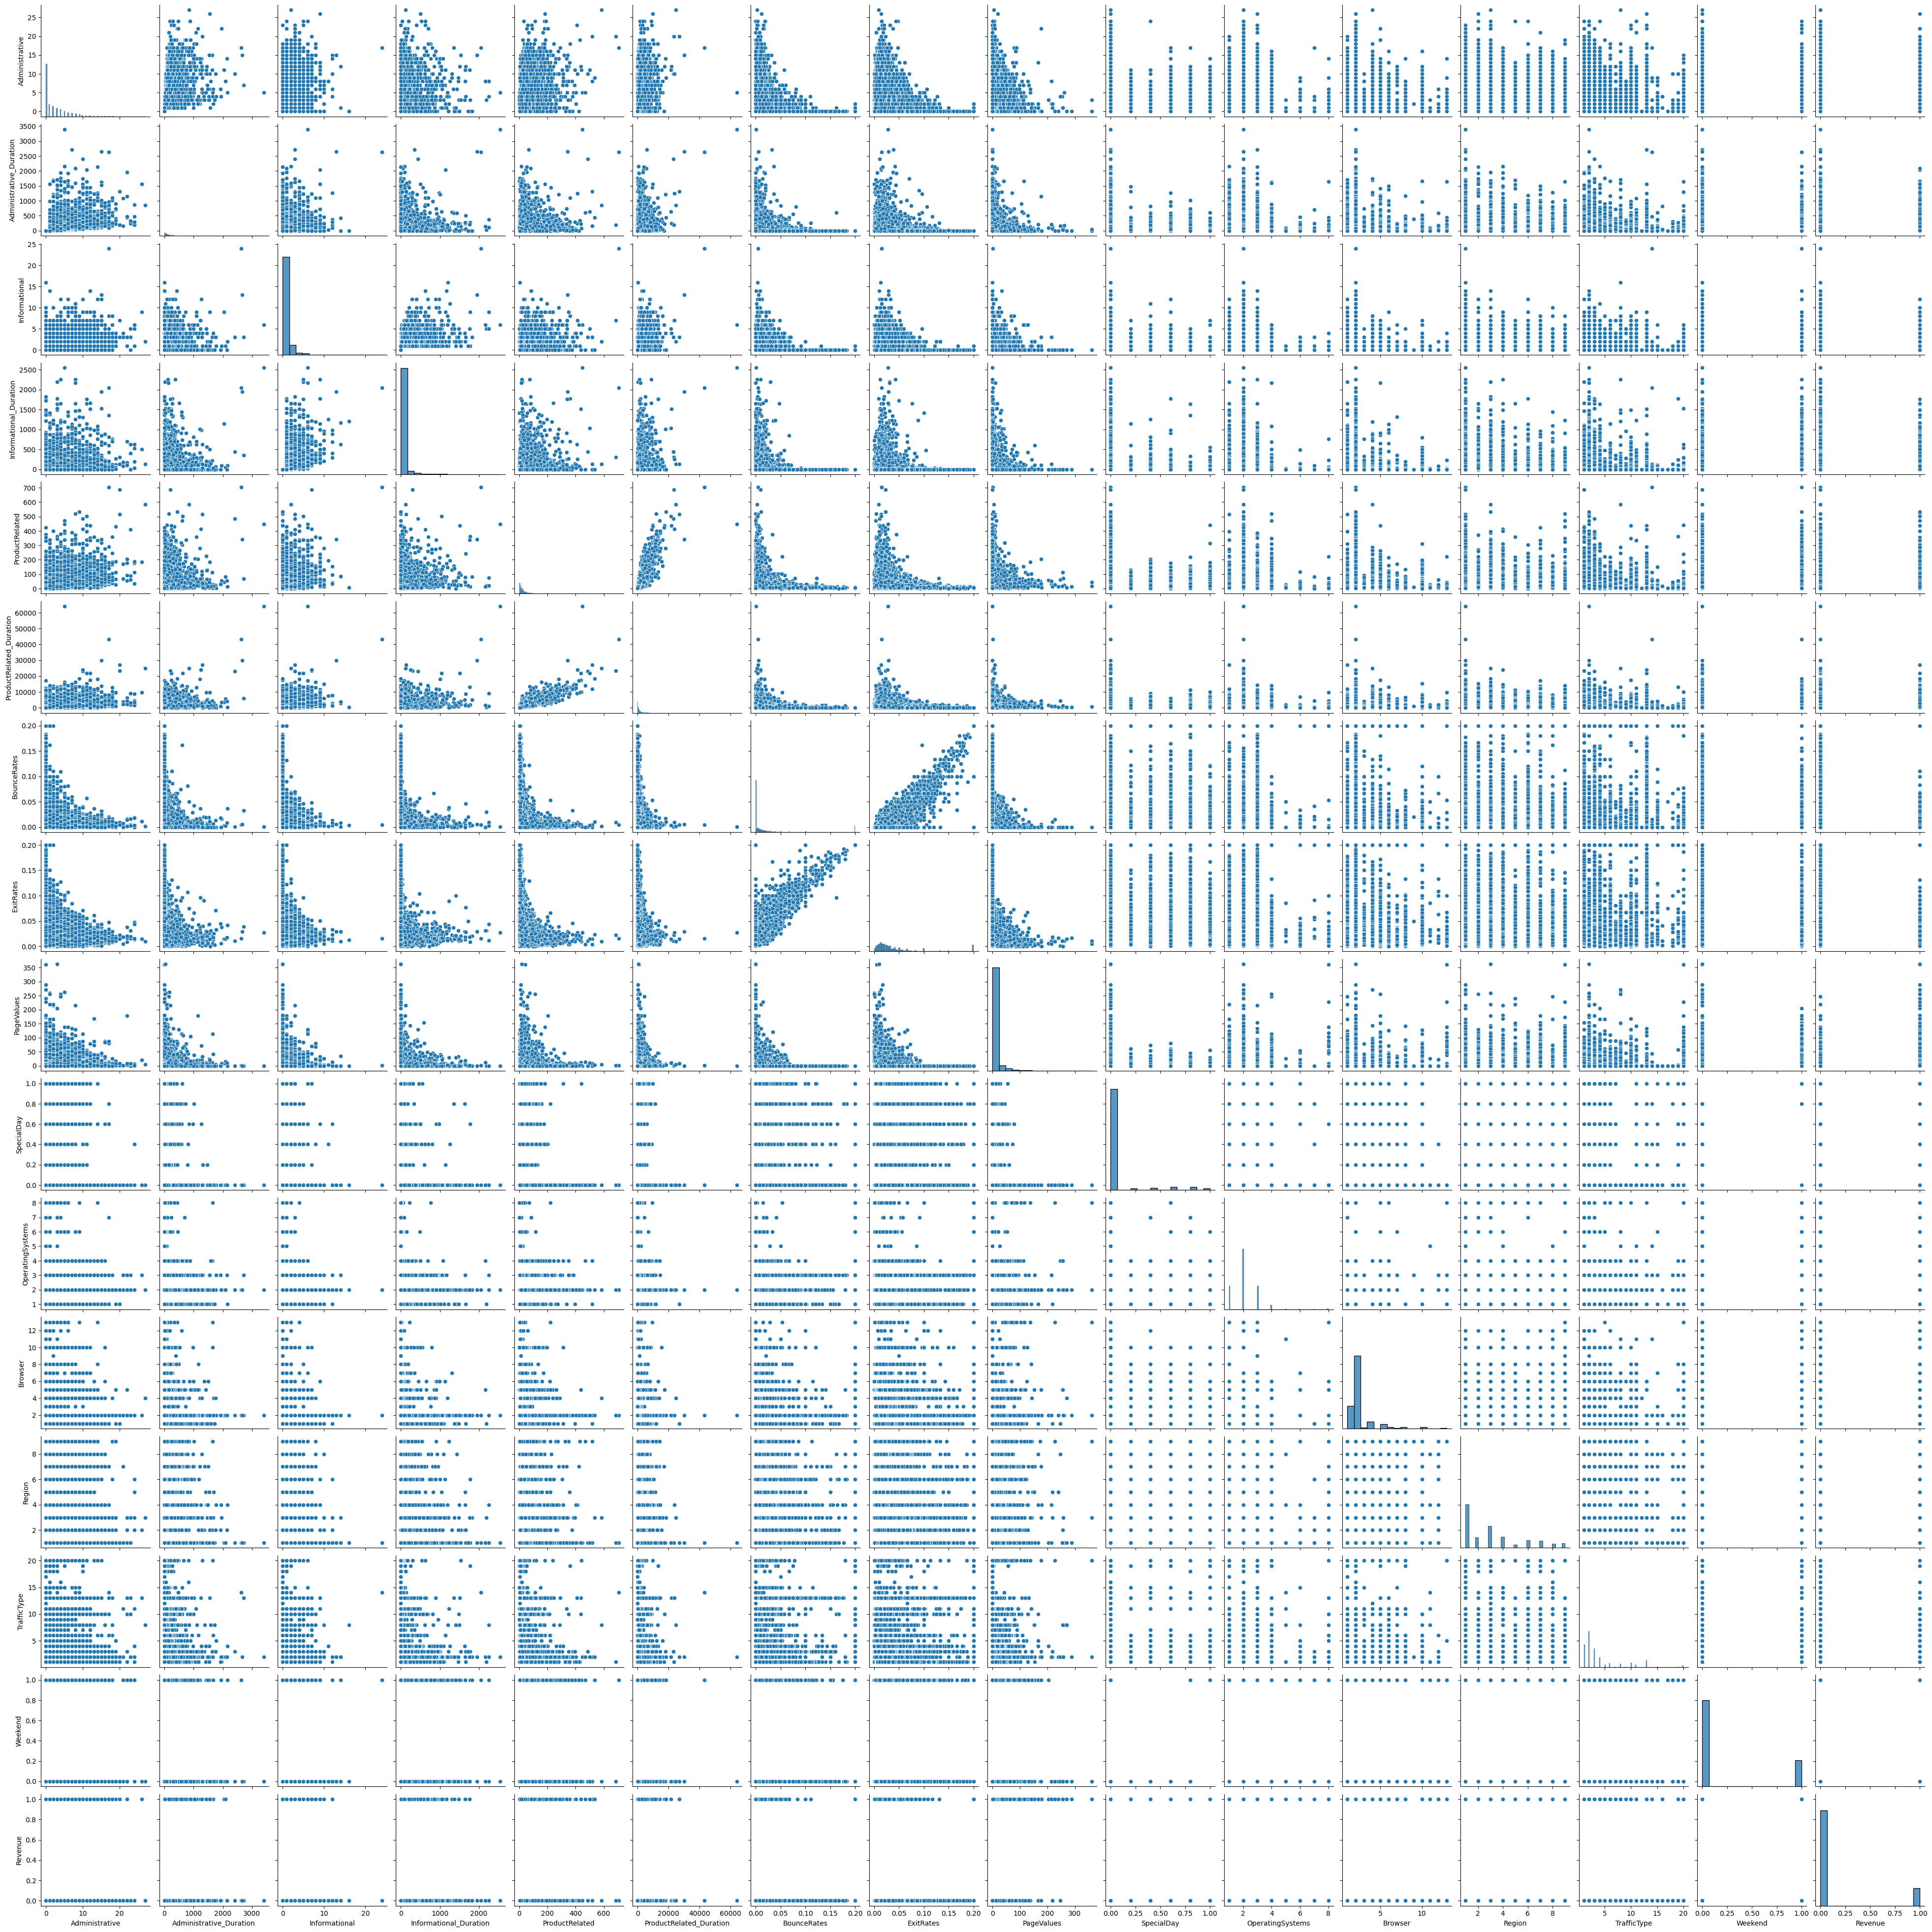

In [3]:
sns.pairplot(df)

- Administrative, Administrative_Duration, Informational, Informational_Duration and ProductRelated are inversely proportional to BounceRates, ExitRates and PageValues.
- BounceRates and ExitRates are proportional to each other.


# Data preprocessing

Firstly, it's needed to drop any null and duplicate values.

In [4]:
print("df.shape before dropping null and duplicate values: ", df.shape)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print("df.shape after dropping null and duplicate values: ", df.shape)

df.shape before dropping null and duplicate values:  (12330, 18)
df.shape after dropping null and duplicate values:  (12205, 18)


Check every columns' type to see if any object class appears.

In [5]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

We need to encode categorical variables, such as Month and VisitorType, as their type is currently object, and not numerical such as int/float/boolean

Learn how many different values of Month in the dataset.

In [6]:
pd.value_counts(df.Month)

/var/folders/gb/v7w609650d9dtbhdgz9jw5tm0000gn/T/ipykernel_1556/2494705613.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.Month)


Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64

In [7]:
# Replace each month with its number, then convert the column from object to int64
df["Month"] = df["Month"].replace("Feb", "2")
df["Month"] = df["Month"].replace("Mar", "3")
df["Month"] = df["Month"].replace("May", "5")
df["Month"] = df["Month"].replace("June", "6")
df["Month"] = df["Month"].replace("Jul", "7")
df["Month"] = df["Month"].replace("Aug", "8")
df["Month"] = df["Month"].replace("Sep", "9")
df["Month"] = df["Month"].replace("Oct", "10")
df["Month"] = df["Month"].replace("Nov", "11")
df["Month"] = df["Month"].replace("Dec", "12")

df['Month'] = pd.to_numeric(df['Month'])
pd.value_counts(df.Month)

/var/folders/gb/v7w609650d9dtbhdgz9jw5tm0000gn/T/ipykernel_1556/4007889756.py:14: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.Month)


Month
5     3329
11    2982
3     1860
12    1706
10     549
9      448
8      433
7      432
6      285
2      181
Name: count, dtype: int64

Currently, each month is represented by a number, and the Month column's type has changed from object to int64.

Learn how many different visitor types in the dataset

In [8]:
pd.value_counts(df.VisitorType)

/var/folders/gb/v7w609650d9dtbhdgz9jw5tm0000gn/T/ipykernel_1556/2644804850.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.VisitorType)


VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: count, dtype: int64

In [9]:
# Returning = 1, new = 0 and other = -1
df["VisitorType"] = df["VisitorType"].replace("Returning_Visitor", "1")
df["VisitorType"] = df["VisitorType"].replace("New_Visitor", "0")
df["VisitorType"] = df["VisitorType"].replace("Other", "-1")

df['VisitorType'] = pd.to_numeric(df['VisitorType'])
pd.value_counts(df.VisitorType)

/var/folders/gb/v7w609650d9dtbhdgz9jw5tm0000gn/T/ipykernel_1556/1006231054.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.VisitorType)


VisitorType
 1    10431
 0     1693
-1       81
Name: count, dtype: int64

Currently, each visitor type is represented by an integer. 1 means they are a returning visitor, 0 means new visitor and -1 means other.\
The VisitorType column's type has changed from object to int64

In [10]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                       bool
Revenue                       bool
dtype: object

All the features types are in numerical.

# Feature engineering

I created three new features, called Admin_Avg, Info_Avg and Prod_Avg
- Admin_Avg: average time spent on per administrative page
- Info_Avg: average time spent on per informational page
- Prod_Avg: average time spent on per product related page

In [11]:
# Add new features
# Adding average time spent on per administrative, informational and product related pages
admin_avg =[]
for i in range (len(df.index)):
    if df.iloc[i]['Administrative_Duration'] == 0:
        admin_avg.append(0)
    else:
        admin_avg.append(df.iloc[i]['Administrative_Duration']/ df.iloc[i]['Administrative'])
df['Admin_Avg'] = admin_avg

info_avg =[]
for i in range (len(df.index)):
    if df.iloc[i]['Informational_Duration'] == 0:
        info_avg.append(0)
    else:
        info_avg.append(df.iloc[i]['Informational_Duration']/ df.iloc[i]['Informational'])
df['Info_Avg'] = info_avg

prod_avg =[]
for i in range (len(df.index)):
    if df.iloc[i]['ProductRelated_Duration'] == 0:
        prod_avg.append(0)
    else:
        prod_avg.append(df.iloc[i]['ProductRelated_Duration']/ df.iloc[i]['ProductRelated'])
df['Prod_Avg'] = prod_avg

df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Admin_Avg,Info_Avg,Prod_Avg
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,1,1,1,1,False,False,0.000000,0.0,0.000000
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,2,2,1,2,1,False,False,0.000000,0.0,32.000000
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,4,1,9,3,1,False,False,0.000000,0.0,0.000000
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,3,2,2,4,1,False,False,0.000000,0.0,1.333333
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,3,3,1,4,1,True,False,0.000000,0.0,62.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,4,6,1,1,1,True,False,48.333333,0.0,33.656447
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,3,2,1,8,1,True,False,0.000000,0.0,93.150000
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,3,2,1,13,1,True,False,0.000000,0.0,30.708333
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,2,2,3,11,1,False,False,18.750000,0.0,23.066667


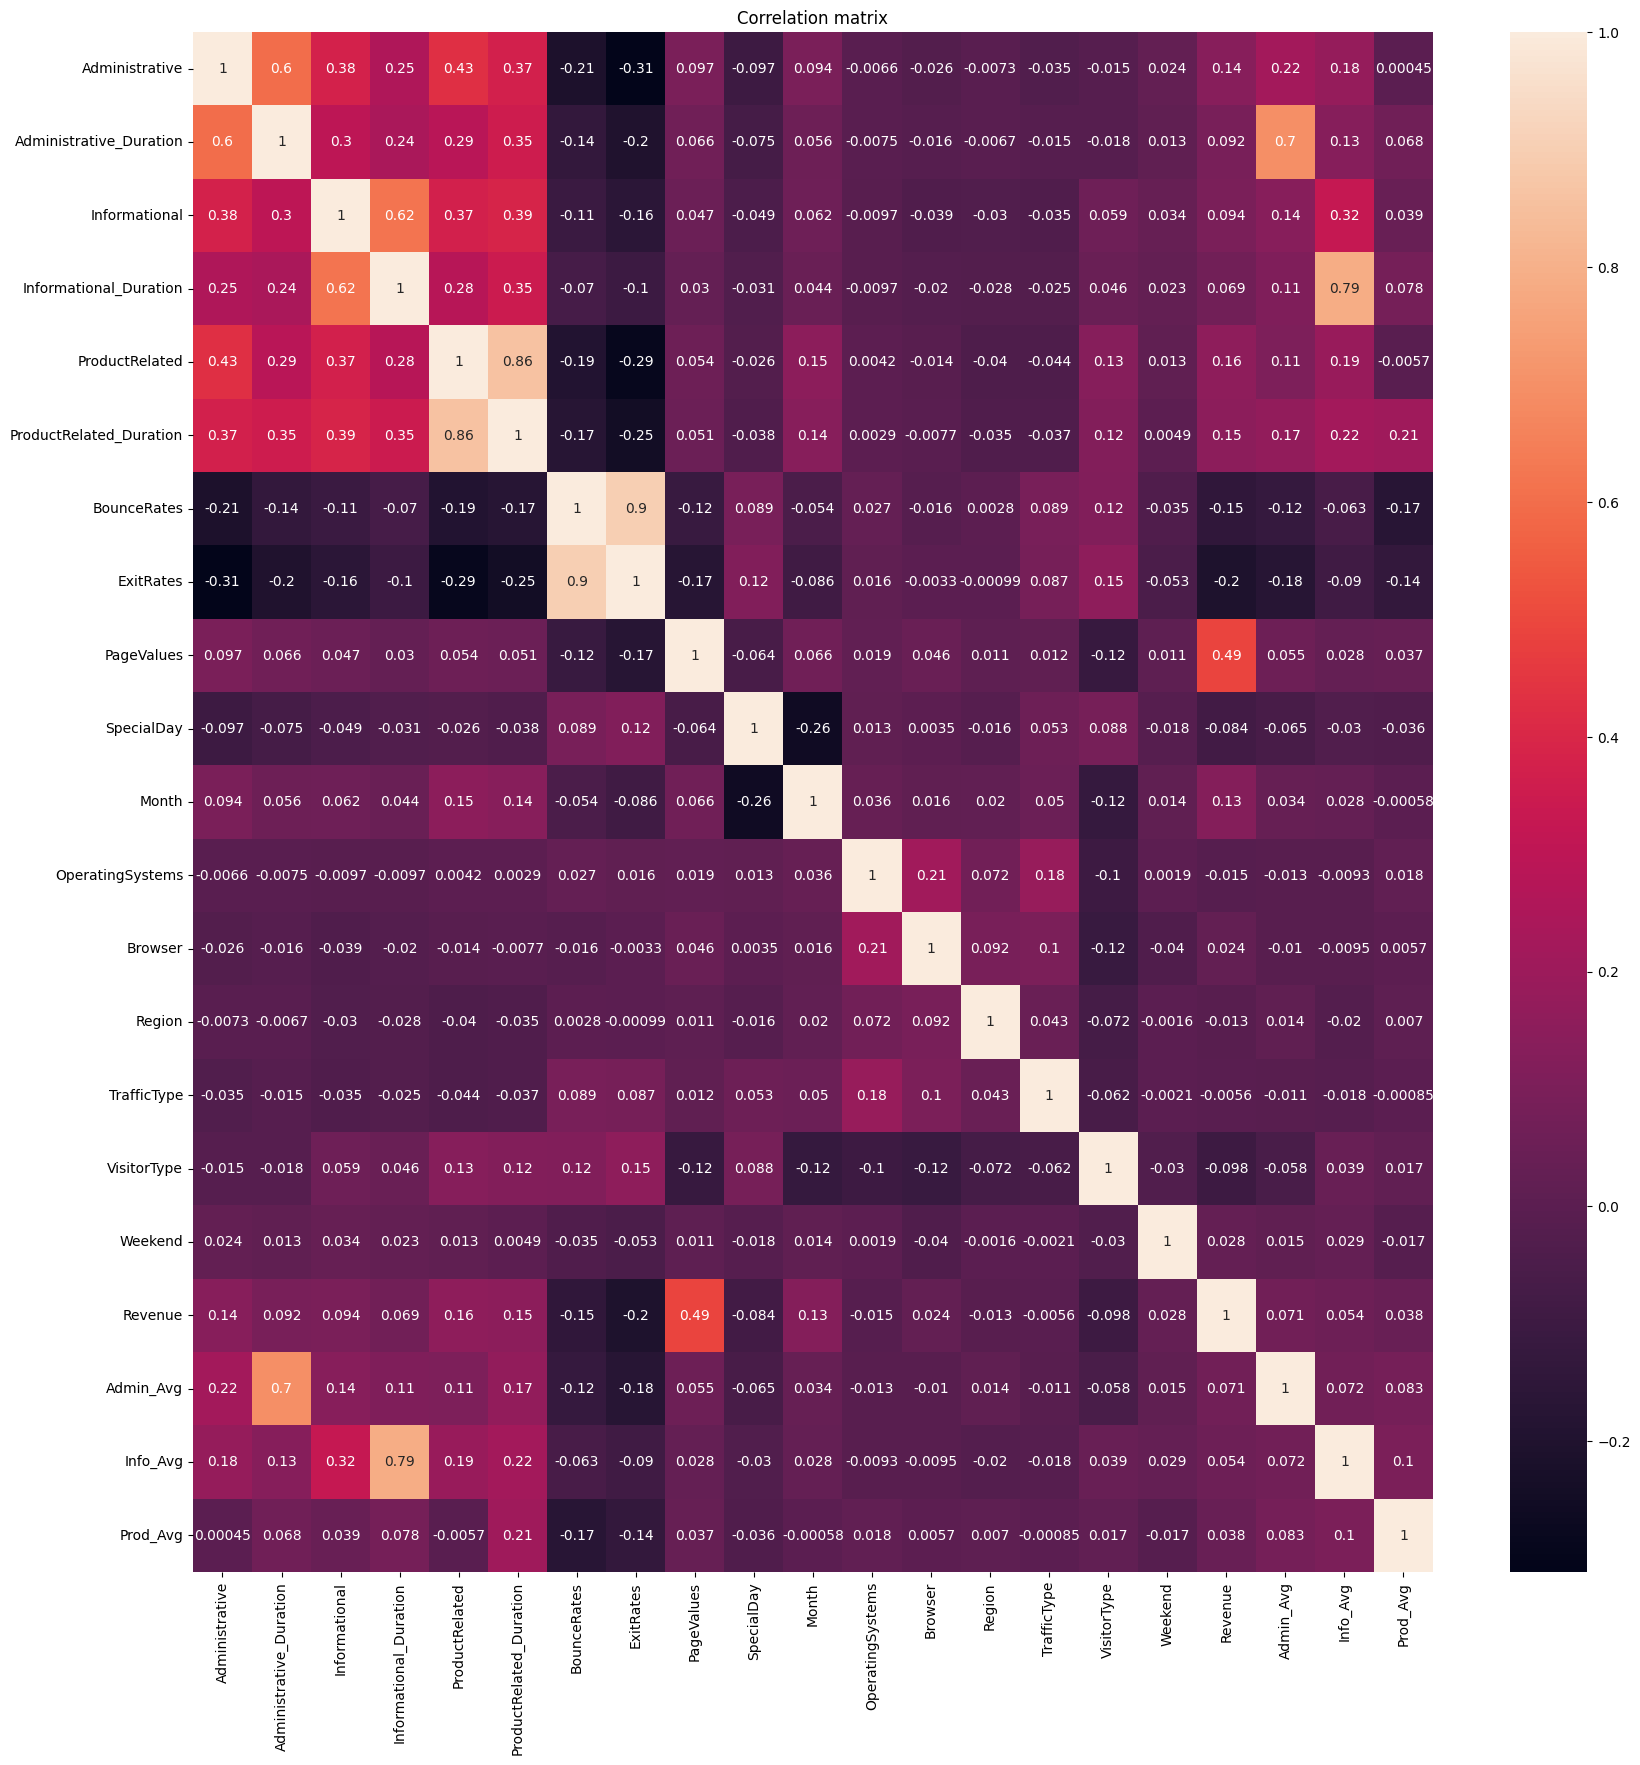

In [12]:
# Create correlation matrix
matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(matrix, annot=True)
plt.title("Correlation matrix")
plt.show()

- Revenue is negatively correlated with BounceRates, ExitRates, SpecialDay, OperatingSystems, Region and TrafficType
- Highest correlation of revenue is with PageValues.
- Dropping the features that has a lower absolute correlation score than 0.05, which are OperatingSystems, Browser, Region, TrafficType, Weekend and Prod_Avg

# Model Building

In [13]:
X = df.drop(['Revenue', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Prod_Avg'], axis=1)
y = df['Revenue']
X = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support vector machine
- Linear and polynomial kernel with hyperparameter tuning on C
- 5-fold cross validation with regards to F1 score

Hyperparameter tuning on regularization parameter C with linear kernel

In [14]:
best_f1_svm_l = 0.0
best_c_svm_l = 0
for i in [0.1, 1, 10, 100]:
    svm_model_l = SVC(kernel='linear', random_state=42, C=i)
    svm_model_l.fit(X_train, y_train)
    y_pred_svm_linear = svm_model_l.predict(X_test)
    svm_f1_linear = f1_score(y_test, y_pred_svm_linear)
    print("SVM (linear kernel, C = ", i , ") \tF1: ", svm_f1_linear)
    if(svm_f1_linear > best_f1_svm_l):
        best_f1_svm_l = svm_f1_linear
        best_c_svm_l = i
svm_model_l = SVC(kernel='linear', random_state=42, C=best_c_svm_l)
svm_model_l.fit(X_train, y_train)
print("\nSVM best (linear kernel, C = ", i , ") \tF1: ", svm_f1_linear)


SVM (linear kernel, C =  0.1 ) 	F1:  0.5072992700729927
SVM (linear kernel, C =  1 ) 	F1:  0.5063752276867031
SVM (linear kernel, C =  10 ) 	F1:  0.5063752276867031
SVM (linear kernel, C =  100 ) 	F1:  0.5063752276867031

SVM best (linear kernel, C =  100 ) 	F1:  0.5063752276867031


Even though C = 1, 10 and 100 gives the same result, the unseen digits are different, hence why 100 was chosen by the code.

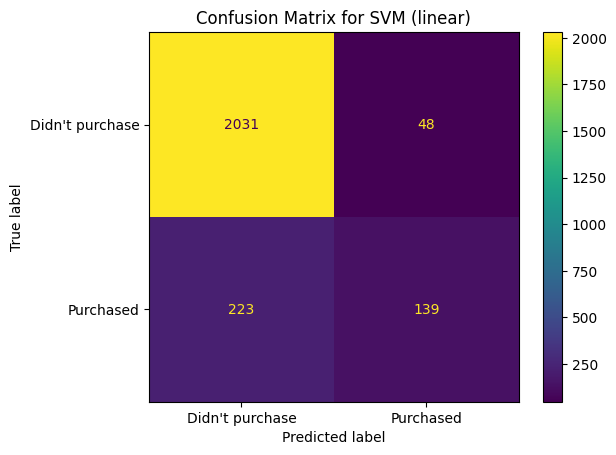

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred_svm_linear)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= ["Didn't purchase", "Purchased"])
disp.plot()
plt.title("Confusion Matrix for SVM (linear)")
plt.show()

In [16]:
# Cross-validate model across 5 different experiments
cross_val_svm_l = cross_val_score(svm_model_l, X, y, cv=5, scoring='f1_macro')
print("Cross validation score array for SVM - linear: \n")
for i in range(0, len(cross_val_svm_l)):
    print("iteration ", i, " F1: ", cross_val_svm_l[i])
print("\nCross validation F1 score mean: ", cross_val_svm_l.mean())

Cross validation score array for SVM - linear: 

iteration  0  F1:  0.7576717768447092
iteration  1  F1:  0.7591925638961877
iteration  2  F1:  0.7309822289571566
iteration  3  F1:  0.6830964223047944
iteration  4  F1:  0.6864352484171915

Cross validation F1 score mean:  0.7234756480840079


In [17]:
print('Classification Report (SVM - linear):')
print(classification_report(y_test, y_pred_svm_linear))

print ('AUC Score:')
print (roc_auc_score(y_test, y_pred_svm_linear))

Classification Report (SVM - linear):
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2079
        True       0.74      0.38      0.51       362

    accuracy                           0.89      2441
   macro avg       0.82      0.68      0.72      2441
weighted avg       0.88      0.89      0.87      2441

AUC Score:
0.6804449387322316


Hyperparameter tuning on regularization parameter C with polynomial kernel

In [18]:
best_f1_svm_p = 0.0
best_c_svm_p = 0
for i in [0.1, 1, 10, 100]:
    svm_model_p = SVC(kernel='poly', random_state=42, C=i)
    svm_model_p.fit(X_train, y_train)
    y_pred_svm_poly = svm_model_p.predict(X_test)
    svm_f1_poly = f1_score(y_test, y_pred_svm_poly)
    print("SVM (polynomial kernel, C = ", i , ") \tF1: ", svm_f1_poly)
    if(svm_f1_poly > best_f1_svm_p):
        best_f1_svm_p = svm_f1_poly
        best_c_svm_p = i
svm_model_p = SVC(kernel='poly', random_state=42, C=best_c_svm_p)
svm_model_p.fit(X_train, y_train)
print("\nSVM best (polynomial kernel, C = ", i , ") \tF1: ", svm_f1_poly)

SVM (polynomial kernel, C =  0.1 ) 	F1:  0.34913793103448276
SVM (polynomial kernel, C =  1 ) 	F1:  0.4591439688715953
SVM (polynomial kernel, C =  10 ) 	F1:  0.517304189435337
SVM (polynomial kernel, C =  100 ) 	F1:  0.5376712328767124

SVM best (polynomial kernel, C =  100 ) 	F1:  0.5376712328767124


[[2014   65]
 [ 205  157]]


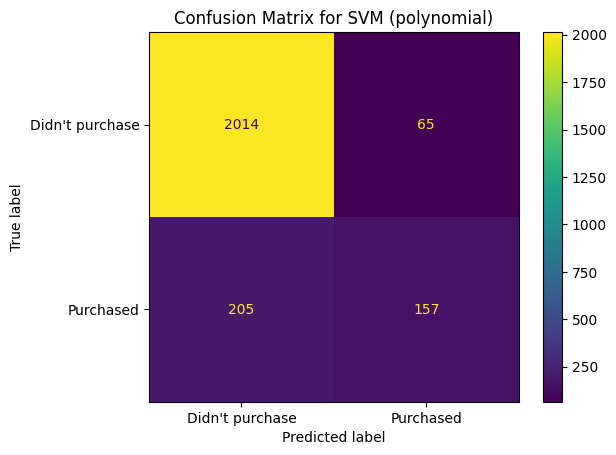

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred_svm_poly)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= ["Didn't purchase", "Purchased"])
disp.plot()
plt.title("Confusion Matrix for SVM (polynomial)")
plt.show()

5-fold cross validation for SVM - polynomial

In [20]:
# Cross-validate model across 5 different experiments
cross_val_svm_p = cross_val_score(svm_model_p, X, y, cv=5, scoring='f1_macro')
print("Cross validation score array for SVM - polynomial: \n")
for i in range(0, len(cross_val_svm_p)):
    print("iteration ", i, " F1: ", cross_val_svm_p[i])
print("\nCross validation F1 score mean: ", cross_val_svm_p.mean())

Cross validation score array for SVM - polynomial: 

iteration  0  F1:  0.7401717286403633
iteration  1  F1:  0.7617286328224961
iteration  2  F1:  0.7341296327633259
iteration  3  F1:  0.6942782546701735
iteration  4  F1:  0.7091669896501729

Cross validation F1 score mean:  0.7278950477093064


In [21]:
print('Classification Report (SVM - polynomial):')
print(classification_report(y_test, y_pred_svm_poly))

print ('AUC Score:')
print (roc_auc_score(y_test, y_pred_svm_poly))

Classification Report (SVM - polynomial):
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2079
        True       0.71      0.43      0.54       362

    accuracy                           0.89      2441
   macro avg       0.81      0.70      0.74      2441
weighted avg       0.88      0.89      0.88      2441

AUC Score:
0.7012183130967661


# Random Forest
- 5-fold cross validation with regards to mean absolute error

In [22]:
mdl_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
mdl_rf.fit(X_train, y_train)
y_pred_rf = mdl_rf.predict(X_test)

<Axes: title={'center': 'Feature Importance - Gini Index (RF)'}, ylabel='Feature'>

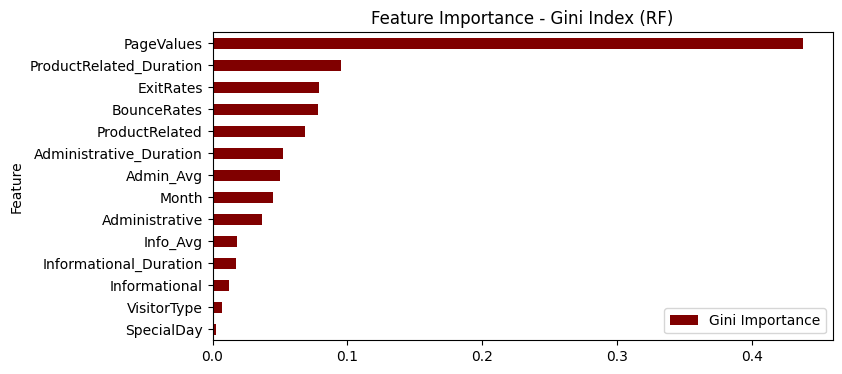

In [23]:
importances = mdl_rf.feature_importances_
feature_names = df.drop(['Revenue', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Prod_Avg'], axis=1).columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
feature_imp_df.sort_values('Gini Importance', ascending=True).plot(kind='barh', x='Feature', figsize=(8, 4), color='maroon', title='Feature Importance - Gini Index (RF)')

In [24]:
# Cross-validate model across 5 different experiments
cross_val_rf = cross_val_score(mdl_rf, X, y, cv=5, scoring='neg_mean_absolute_error')
print("Cross validation score array: \n")
for i in range(0, len(cross_val_rf)):
    cross_val_rf[i] = abs(cross_val_rf[i])
    print("iteration ", i, " mae: ", cross_val_rf[i])
print("\nCross validation score mean: ", cross_val_rf.mean())

Cross validation score array: 

iteration  0  mae:  0.06442031954117165
iteration  1  mae:  0.08008193363375665
iteration  2  mae:  0.18390896468404164
iteration  3  mae:  0.19880786562884062
iteration  4  mae:  0.20428585204681066

Cross validation score mean:  0.14630098710692424


In [25]:
print ('AUC Score:')
print (roc_auc_score(y_test, y_pred_rf))

AUC Score:
0.926951705957231


# Logistic Regression

In [26]:
# Build Logistic Regression model
model_lr = LogisticRegression(random_state=1)
model_lr.fit(X_train, y_train)
y_test_pred_lr = model_lr.predict(X_test)

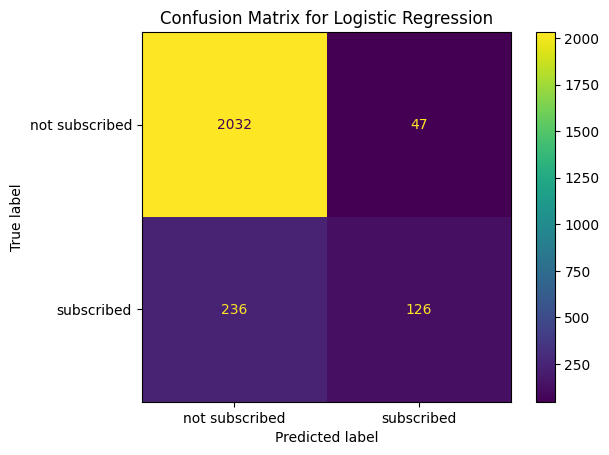

In [27]:
# Confusion matrix for Logistic Regression model
conf_matrix = confusion_matrix(y_test, y_test_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= ["not subscribed", "subscribed"])
disp.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [28]:
print('Classification Report (Logistic Regression):')
print(classification_report(y_test, y_test_pred_lr))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred_lr))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       False       0.90      0.98      0.93      2079
        True       0.73      0.35      0.47       362

    accuracy                           0.88      2441
   macro avg       0.81      0.66      0.70      2441
weighted avg       0.87      0.88      0.87      2441

AUC Score:
0.6627296378677594


# Takeways
- All of the code was run on MacOS with Apple Silicone chip using VSCode, did not test if it works on Linux (Colab) or Windows.
- The dataset is imbalanced, as it can be seen from the confusion martices, where the count of not subscribed is around 2000 in the test dataset, and count of subscribed is around 350. This can be solved bu undersampling the dataset, but may cause the models to be not as high performing as before, as it now needs to learn from a much smaller dataset.
- The feature that affects the label the most is PageValues, second in line are ProductRelated_Duration; ExitRates and BounceRates are quite close. PageValues has 4 times higher Gini index score than ProductRelated_Duration.
- Highest AUC score is achieved in Random Forest, second in line is SVM with polynomial kernel, third SVM with linear kernel and last place belongs to Logistic Regression.
- Logistic regression, SVM-linear and SVM-polynomial has similar F1 scores, where label "false/didn't purchase" has around 0.9 F1 score, and label "true/purchased" has around 0.5 F1 score.
- With hyperparameter tuning and cross validation, SVM-linear's F1 score has increased from 0.507 (C=0.1 by default) to 0.723. In SVM-polynomial, F1 score has increased from 0.349 to 0.727.